# Series objects

In [2]:
# Creating a series

import pandas as pd


In [3]:
s = pd.Series([2,-1,3,5])
print(s)

0    2
1   -1
2    3
3    5
dtype: int64


In [48]:
s

0    2
1   -1
2    3
3    5
dtype: int64

In [4]:
# Pass as parameters to NumPy functions

import numpy as np
np.square(s)

0     4
1     1
2     9
3    25
dtype: int64

In [5]:
# Arithmetic operation on the series

s + [1000,2000,3000,4000]

0    1002
1    1999
2    3003
3    4005
dtype: int64

In [51]:
# Broadcasting

s + 1000

0    1002
1     999
2    1003
3    1005
dtype: int64

In [53]:
s

0    2
1   -1
2    3
3    5
dtype: int64

In [52]:
# Binary and conditional operations

s < 0

0    False
1     True
2    False
3    False
dtype: bool

In [14]:
# Index labels

# Each item in a Series object has a unique identifier called the index label.
# By default, it is simply the rank of the item in the Series (starting at 0)

s2 = pd.Series([68, 83, 112, 68])
print(s2)

0     68
1     83
2    112
3     68
dtype: int64


In [7]:
# Set the index labels manually

s2 = pd.Series([68, 83, 112, 68], index=["alice", "bob", "charles", "darwin"])
print(s2)

alice       68
bob         83
charles    112
darwin      68
dtype: int64


In [8]:
# Access the items in series
# We can either access the items by specifying integer location or label

print(s2[1])
print(s2["bob"])

83
83


In [58]:
# It is recommended to always use the loc attribute when accessing by label, 
# and the iloc attribute when accessing by integer location

print(s2.loc["bob"])
print(s2.iloc[1])

83
83


In [10]:
# Init from dict
# We can create Series object from Python dict

weights = {"alice": 68, "bob": 83, "colin": 86, "darwin": 68}
s3 = pd.Series(weights)
print(s3)

alice     68
bob       83
colin     86
darwin    68
dtype: int64


In [11]:
# We can control which elements you want to include in the Series and 
# in what order by explicitly specifying the desired index

s4 = pd.Series(weights, index = ["colin", "alice"])
print(s4)

colin    86
alice    68
dtype: int64


In [12]:
# Automatic alignment
# When an operation involves multiple Series objects, pandas automatically aligns items by matching index labels
# Note NaN


print(s2)
print("\n")
print(s3)
print("\n")
print(s2+s3)


alice       68
bob         83
charles    112
darwin      68
dtype: int64


alice     68
bob       83
colin     86
darwin    68
dtype: int64


alice      136.0
bob        166.0
charles      NaN
colin        NaN
darwin     136.0
dtype: float64


In [13]:
print(s2)
print("-"*4)
print(s3)
print("-"*4)
print(s4)
print("-"*4)


print(pd.DataFrame([s2,s3, s4]))

alice       68
bob         83
charles    112
darwin      68
dtype: int64
----
alice     68
bob       83
colin     86
darwin    68
dtype: int64
----
colin    86
alice    68
dtype: int64
----
   alice   bob  charles  colin  darwin
0   68.0  83.0    112.0    NaN    68.0
1   68.0  83.0      NaN   86.0    68.0
2   68.0   NaN      NaN   86.0     NaN


In [13]:
# Do not forget to set the right index labels, else you may get surprising results

s5 = pd.Series([1000,1000,1000,1000])
print(s2)
print("\n")
print(s5)
print("\n")

print(s2 + s5)

alice       68
bob         83
charles    112
darwin      68
dtype: int64


0    1000
1    1000
2    1000
3    1000
dtype: int64


alice     NaN
bob       NaN
charles   NaN
darwin    NaN
0         NaN
1         NaN
2         NaN
3         NaN
dtype: float64


In [63]:
# Init with a scalar

meaning = pd.Series(42, ["life", "universe", "everything"])
print(meaning)

life          42
universe      42
everything    42
dtype: int64


In [14]:
# Series name
# Here the series name is weights

s6 = pd.Series([83, 68], index=["bob", "alice"], name="weights")
print(s6)

bob      83
alice    68
Name: weights, dtype: int64


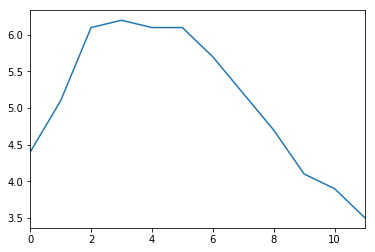

In [15]:
# Plotting a series

%matplotlib inline
import matplotlib.pyplot as plt
temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
s7 = pd.Series(temperatures, name="Temperature")
s7.plot()
plt.show()

# DataFrame objects

In [87]:
# We can create a DataFrame by passing a dictionary of Series objects:
people_dict = {
    "weight": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "birthyear": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year"),
    "children": pd.Series([0, 3], index=["charles", "bob"]),
    "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}
people = pd.DataFrame(people_dict)
people

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


In [69]:
# Access a column
people["birthyear"]

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

In [70]:
# Access the multiple columns at once

people[["birthyear", "hobby"]]

,birthyear,hobby
alice,1985,Biking
bob,1984,Dancing
charles,1992,NaN


In [71]:
people_dict

{'birthyear': bob        1984
 alice      1985
 charles    1992
 Name: year, dtype: int64, 'children': charles    0
 bob        3
 dtype: int64, 'hobby': alice     Biking
 bob      Dancing
 dtype: object, 'weight': alice       68
 bob         83
 charles    112
 dtype: int64}

In [86]:
# If you pass a list of columns and/or index row labels to the DataFrame constructor, 
# It will guarantee that these columns and/or rows will exist, in that order, and no other column/row will exist

d2 = pd.DataFrame(
        people_dict,
        columns=["birthyear", "weight", "height"],
        index=["bob", "alice", "eugene"]
     )
print(d2)

        birthyear  weight height
bob        1984.0    83.0    NaN
alice      1985.0    68.0    NaN
eugene        NaN     NaN    NaN


In [75]:
people

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


In [21]:
# Accessing rows
# Using loc

people.loc["charles"]

birthyear    1992
children        0
hobby         NaN
weight        112
Name: charles, dtype: object

In [74]:
# Accessing rows
# Using iloc

people.iloc[2]

birthyear    1992
children        0
hobby         NaN
weight        112
Name: charles, dtype: object

In [23]:
# Get a slice of rows

people.iloc[1:3]

,birthyear,children,hobby,weight
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


In [76]:
people

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


In [24]:
# Pass a boolean array to get the matching rows

people[np.array([True, False, True])]

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
charles,1992,0.0,NaN,112


In [78]:
# Pass boolean expression
people[people["birthyear"] < 1990]

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83


In [90]:
# Adding and removing columns

people["age"] = 2016 - people["birthyear"]  # adds a new column "age"
print(people["age"])
print("--"*4)
people["over 30"] = people["age"] > 30      # adds another column "over 30"
print(people["over 30"])
print(people)
birthyears = people.pop("birthyear")
print(people)
del people["children"]
people


KeyError: 'birthyear'

In [91]:
# When you add a new colum, it must have the same number of rows. 
# Missing rows are filled with NaN, and extra rows are ignored

people["pets"] = pd.Series({
"bob": 0, 
"charles": 5,
"eugene":1
}) 

people

,children,hobby,weight,age,over 30,pets
alice,NaN,Biking,68,31,True,NaN
bob,3.0,Dancing,83,32,True,0.0
charles,0.0,NaN,112,24,False,5.0


In [92]:
# Add a new column using insert method

people.insert(1, "height", [172, 181, 185])
people

,children,height,hobby,weight,age,over 30,pets
alice,NaN,172,Biking,68,31,True,NaN
bob,3.0,181,Dancing,83,32,True,0.0
charles,0.0,185,NaN,112,24,False,5.0


In [ ]:
# Add new column using assign method

def myfunc(x):
    print(x)
    return x["height"]**2;
people.assign(square = myfunc)

In [99]:
# Add new column using assign method

people = (people
     .assign(body_mass_index = lambda df: df["weight"] / (df["height"] / 100) ** 2)
     .assign(overweight = lambda df: df["body_mass_index"] > 25)
)
print(people)

         children  height    hobby  weight  age  over 30  pets  \
alice         NaN     172   Biking      68   31     True   NaN   
bob           3.0     181  Dancing      83   32     True   0.0   
charles       0.0     185      NaN     112   24    False   5.0   

         body_mass_index  overweight  
alice          22.985398       False  
bob            25.335002        True  
charles        32.724617        True  


In [100]:
# Querying a DataFrame

people.query("age > 30 and pets == 0")

,children,height,hobby,weight,age,over 30,pets,body_mass_index,overweight
bob,3.0,181,Dancing,83,32,True,0.0,25.335002,True


In [31]:
# Sorting a DataFrame
# By default it sorts the rows by their index label, in ascending order
# Let's reverse the order
people.sort_index(ascending=False)

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
charles,NaN,185,112,24,False,5.0,32.724617,True
bob,Dancing,181,83,32,True,0.0,25.335002,True
alice,Biking,172,68,31,True,NaN,22.985398,False


In [32]:
# Inplace sorting

people.sort_index(inplace=True)
people

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
alice,Biking,172,68,31,True,NaN,22.985398,False
bob,Dancing,181,83,32,True,0.0,25.335002,True
charles,NaN,185,112,24,False,5.0,32.724617,True


In [33]:
# Sort by value

people.sort_values(by="age", inplace=True)
people

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
charles,NaN,185,112,24,False,5.0,32.724617,True
alice,Biking,172,68,31,True,NaN,22.985398,False
bob,Dancing,181,83,32,True,0.0,25.335002,True


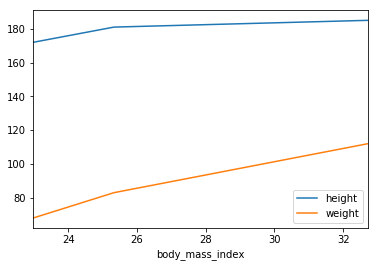

In [106]:
# Plotting a DataFrame

people.plot(
    kind = "line", 
    x = "body_mass_index", 
    y = ["height", "weight"]
)

plt.show()

In [108]:
# Saving and Loading
# Let’s create a new DataFrame my_df and save it in various formats

my_df = pd.DataFrame(
    [["Biking", 68.5, 1985, np.nan], ["Dancing", 83.1, 1984, 3]], 
    columns=["hobby","weight","birthyear","children"],
    index=["alice", "bob"]
)
my_df


,hobby,weight,birthyear,children
alice,Biking,68.5,1985,NaN
bob,Dancing,83.1,1984,3.0


In [114]:
# Save to CSV, HTML and JSON

my_df.to_csv("my_df.csv")
my_df.to_html("my_df.html")
my_df.to_json("my_df.json")

In [115]:
!ls


dataset		       my_df.csv    Python - Numpy.ipynb    simpleexp.py
hello.py	       my_df.html   Python - Pandas.ipynb   Untitled.ipynb
Lambda Operator.ipynb  my_df.json   Python - Part II.ipynb
mbox-short.txt	       myglib.py    Python - Part I.ipynb
mbox.txt	       __pycache__  README


In [118]:
!cat my_df.json

{"hobby":{"alice":"Biking","bob":"Dancing"},"weight":{"alice":68.5,"bob":83.1},"birthyear":{"alice":1985,"bob":1984},"children":{"alice":null,"bob":3.0}}

In [37]:
# Let's take a peek at what was saved

for filename in ("my_df.csv", "my_df.html", "my_df.json"):
    print("#", filename)
    with open(filename, "rt") as f:
        print(f.read())
        print()

# my_df.csv
,hobby,weight,birthyear,children
alice,Biking,68.5,1985,
bob,Dancing,83.1,1984,3.0


# my_df.html
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>hobby</th>
      <th>weight</th>
      <th>birthyear</th>
      <th>children</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>alice</th>
      <td>Biking</td>
      <td>68.5</td>
      <td>1985</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>bob</th>
      <td>Dancing</td>
      <td>83.1</td>
      <td>1984</td>
      <td>3.0</td>
    </tr>
  </tbody>
</table>

# my_df.json
{"hobby":{"alice":"Biking","bob":"Dancing"},"weight":{"alice":68.5,"bob":83.1},"birthyear":{"alice":1985,"bob":1984},"children":{"alice":null,"bob":3.0}}



In [38]:
# Load CSV file

my_df_loaded = pd.read_csv("my_df.csv", index_col=0)
my_df_loaded

,hobby,weight,birthyear,children
alice,Biking,68.5,1985,NaN
bob,Dancing,83.1,1984,3.0


In [119]:
# Overview

housing = pd.read_csv("dataset/housing.csv")

In [120]:
# The head method returns the top 5 rows

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [124]:
# The tail method returns the bottom 5 rows. we can also pass the number of rows we want

housing.tail(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [42]:
# The info method prints out the summary of each columns contents

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [43]:
# The describe method gives a nice overview of the main aggregated values over each column
# See Slide # 131
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


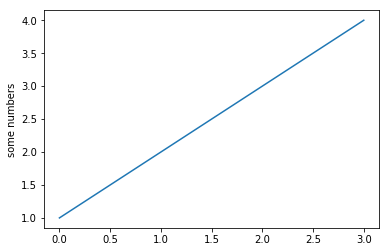

In [44]:
# matplotlib - pyplot Module - plot()

import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

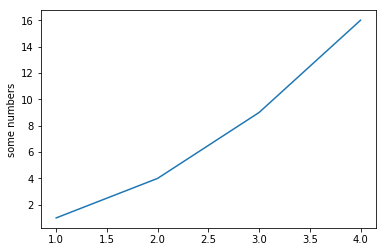

AttributeError: module 'matplotlib.pyplot' has no attribute 'data'

In [129]:
# matplotlib - pyplot Module - plot() - plot x versus y
# See Slide # 132

import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.ylabel('some numbers')
plt.show()


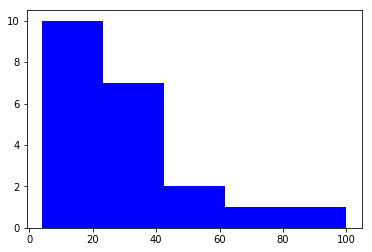

In [130]:
# matplotlib - pyplot Module - Histogram

import matplotlib.pyplot as plt
x = [21,22,23,4,5,6,77,8,9,10,31,32,33,34,35,36,37,18,49,50,100]
num_bins = 5
plt.hist(x, num_bins, facecolor='blue')
plt.show()